In [1]:
import pandas as pd
import seaborn as sns
from igel import Igel
tweets = pd.read_csv("train.csv")
tweets.head()

feature_vec = pd.read_csv("feature_vec.csv")
feature_vec.head()

,Unnamed: 0,timestamp,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,0,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.000000,11.110000,14.290000
1,1,1.565105e+12,1.158762e+18,9.0,28.0,8.0,0.0,70.0,33.0,0.0,4.0,16.670000,11.110000,13.330000
2,2,1.565105e+12,1.158760e+18,5.0,37.0,12.0,0.0,57.0,220.0,61.0,3.0,33.330002,22.219999,26.670000
3,3,1.565105e+12,1.158759e+18,7.0,47.0,15.0,0.0,80.0,106.0,124.0,0.0,22.219999,22.219999,22.219999
4,4,1.565105e+12,1.158759e+18,3.0,65.0,8.0,0.0,57.0,550.0,720.0,7.0,14.290000,11.110000,12.500000


In [2]:
#CSV

csv1 = 'train.csv'
csv2 = 'feature_vec.csv'
csv3 = 'categorised-ranked-tweets.csv'

# YAMLs
cluster_yaml = 'yaml/cluster.yaml'
forest_yaml = 'yaml/hyper.yaml' # doesn't work for fit on train
iris_yaml = 'yaml/iris.yaml'
reges_yaml = 'yaml/regres.yaml'
forest_2_yaml = 'yaml/forest.yaml'


data_path = csv1
yaml = reges_yaml





## Fit

In [3]:


# provide the arguments in a dictionary
params = {
        'cmd': 'fit',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': 'topics.csv',
        'yaml_path': forest_2_yaml
}

Igel(**params)


INFO - Entered CLI args: {'cmd': 'fit', 'data_path': 'topics.csv', 'yaml_path': 'yaml/forest.yaml'}
INFO - Executing command: fit ...
INFO - reading data from topics.csv
INFO - You passed the configurations as a yaml file.
INFO - your chosen configuration: {'dataset': {'type': 'csv', 'random_numbers': {'generate_reproducible': True, 'seed': 42}, 'split': {'test_size': 0.2, 'shuffle': True}, 'preprocess': {'missing_values': 'mean', 'encoding': {'type': 'oneHotEncoding'}, 'scale': {'method': 'standard', 'target': 'inputs'}}}, 'model': {'type': 'classification', 'algorithm': 'RandomForest', 'arguments': {'n_estimators': 100, 'max_depth': 30}}, 'target': ['eventID']}
INFO - dataset_props: {'type': 'csv', 'random_numbers': {'generate_reproducible': True, 'seed': 42}, 'split': {'test_size': 0.2, 'shuffle': True}, 'preprocess': {'missing_values': 'mean', 'encoding': {'type': 'oneHotEncoding'}, 'scale': {'method': 'standard', 'target': 'inputs'}}} 
model_props: {'type': 'classification', 'algo

In [4]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'evaluate',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': 'topics.csv',
        'yaml_path': forest_2_yaml
}

Igel(**params)

INFO - Entered CLI args: {'cmd': 'evaluate', 'data_path': 'topics.csv', 'yaml_path': 'yaml/forest.yaml'}
INFO - Executing command: evaluate ...
INFO - reading data from topics.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - result path: /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results 
INFO - loading model form /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav 
INFO - dataset shape: (922, 4)
INFO - dataset attributes: ['tweet_id', 'priority', 'label_id', 'eventID']
INFO - Check for missing values in the dataset ...  
tweet_id    0
priority    0
label_id    0
eventID     0
dtype: int64  
 ----------------------------------------------------------------------------------------------------
INFO - shape of the dataset after handling missing values => (922, 4)
INFO - y shape: (922, 1) and x shape: (922, 3)
INFO - performing a standard scaling ...
INFO

In [5]:
from igel import Igel

# provide the arguments in a dictionary
params = {
        'cmd': 'predict',    # provide the command you want to use. whether fit, evaluate or predict
        'data_path': 'feature_vec.csv',
        'yaml_path': forest_2_yaml
}

Igel(**params)



INFO - Entered CLI args: {'cmd': 'predict', 'data_path': 'feature_vec.csv', 'yaml_path': 'yaml/forest.yaml'}
INFO - Executing command: predict ...
INFO - reading data from feature_vec.csv
INFO - path of the pre-fitted model => /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - loading from /Users/pseudo/Documents/GitHub/HelpMe/src/python/notebooks/model_results/model.sav
INFO - dataset shape: (1433, 14)
INFO - dataset attributes: ['Unnamed: 0', 'timestamp', 'tweet_id', 'positive_sentiment', 'negative_sentiment', 'numb_of_questions', 'numb_of_emoticons', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_measure']
INFO - Check for missing values in the dataset ...  
Unnamed: 0            0
timestamp             0
tweet_id              0
positive_sentiment    0
negative_sentiment    0
numb_of_questions     0
numb_of_emoticons     0
tweet_length          0
userFollowersCount    0
user

In [6]:
res = pd.read_csv("model_results/predictions.csv")
#res.reset_index()
res



,result
0,0
1,0
2,0
3,0
4,0
...,...
1304,1
1305,1
1306,1
1307,1


In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  922 non-null    int64  
 1   priority  922 non-null    float64
 2   label_id  922 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.7 KB


In [8]:
mergedDf = tweets.merge(res, left_index=True, right_index=True)
mergedDf

,tweet_id,priority,label_id,result
0,211565974422425600,0.75,19.0,0
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
3,211685621125742592,0.25,16.0,0
4,211877049147736064,0.25,7.0,0
...,...,...,...,...
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1
920,396336297968562176,0.25,7.0,1


In [9]:
mergedDf.to_csv("results_merged.csv", index=False)
df = pd.read_csv("results_merged.csv")
df

,tweet_id,priority,label_id,result
0,211565974422425600,0.75,19.0,0
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
3,211685621125742592,0.25,16.0,0
4,211877049147736064,0.25,7.0,0
...,...,...,...,...
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1
920,396336297968562176,0.25,7.0,1


In [10]:
df.sort_values(by=['result'])
df

,tweet_id,priority,label_id,result
0,211565974422425600,0.75,19.0,0
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
3,211685621125742592,0.25,16.0,0
4,211877049147736064,0.25,7.0,0
...,...,...,...,...
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1
920,396336297968562176,0.25,7.0,1


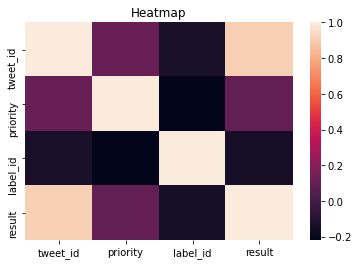

In [11]:
import matplotlib.pyplot as plt


sns.heatmap(df.corr())
plt.title('Heatmap')
plt.savefig('heatmap.png')

In [12]:
df.loc[df['label_id'] == 15.0]



INFO - NumExpr defaulting to 4 threads.


,tweet_id,priority,label_id,result
1,211654415503990784,0.50,15.0,0
2,211681309368655872,0.25,15.0,0
12,212099863171710976,0.25,15.0,0
13,212137133736075264,0.25,15.0,0
24,212298199229149184,0.25,15.0,0
...,...,...,...,...
916,396335979167903744,0.25,15.0,1
917,396336012726525952,0.25,15.0,1
918,396336079856345088,0.25,15.0,1
919,396336243442589696,0.25,15.0,1


In [13]:
df.loc[df['result'] == 2]
#df.describe()


,tweet_id,priority,label_id,result
502,324709329666183168,0.25,15.0,2
503,324711640744460288,0.50,7.0,2
504,324712861278556160,0.25,4.0,2
505,324713159090921472,0.25,15.0,2
506,324713222009651200,0.25,18.0,2
...,...,...,...,...
911,396335475881181184,0.50,7.0,2
912,396335492666773504,0.25,15.0,2
913,396335685570793472,0.25,1.0,2
914,396335786263871488,0.25,4.0,2


In [14]:
feature_vec.head()

feature_vec.loc[feature_vec['tweet_id'] == 1158762608415010800]

,Unnamed: 0,timestamp,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,0,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
251,251,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
538,538,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
572,572,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
859,859,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29
1146,1146,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.0,11.11,14.29


In [15]:
merged_df = df.merge(feature_vec, how='left', on='tweet_id')


In [16]:
merged_df.loc[feature_vec['tweet_id'] == 1158762608415010800]



,tweet_id,priority,label_id,result,Unnamed: 0,timestamp,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure
0,211565974422425600,0.75,19.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,243410216681619456,0.50,13.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,324731639177564160,0.50,13.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,324738891120791552,0.25,18.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,396326609118322688,0.75,14.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
train_df = pd.read_csv("train.csv")
train_df['label'] = 'train'

score_df = pd.read_csv("feature_vec.csv")
score_df['label'] = 'score'

score_df

,Unnamed: 0,timestamp,tweet_id,positive_sentiment,negative_sentiment,numb_of_questions,numb_of_emoticons,tweet_length,userFollowersCount,userFriendsCount,user_list_count,dict_precision,dict_recall,dict_f_measure,label
0,0,1.565106e+12,1.158763e+18,3.0,19.0,9.0,0.0,68.0,1592.0,523.0,94.0,20.000000,11.110000,14.290000,score
1,1,1.565105e+12,1.158762e+18,9.0,28.0,8.0,0.0,70.0,33.0,0.0,4.0,16.670000,11.110000,13.330000,score
2,2,1.565105e+12,1.158760e+18,5.0,37.0,12.0,0.0,57.0,220.0,61.0,3.0,33.330002,22.219999,26.670000,score
3,3,1.565105e+12,1.158759e+18,7.0,47.0,15.0,0.0,80.0,106.0,124.0,0.0,22.219999,22.219999,22.219999,score
4,4,1.565105e+12,1.158759e+18,3.0,65.0,8.0,0.0,57.0,550.0,720.0,7.0,14.290000,11.110000,12.500000,score
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1428,1.565027e+12,1.158432e+18,5.0,41.0,14.0,0.0,93.0,303.0,1465.0,11.0,11.110000,11.110000,11.110000,score
1429,1429,1.565027e+12,1.158432e+18,14.0,44.0,15.0,0.0,92.0,51.0,272.0,4.0,0.000000,0.000000,0.000000,score
1430,1430,1.565026e+12,1.158428e+18,3.0,60.0,48.0,0.0,256.0,382.0,16.0,4.0,0.000000,0.000000,0.000000,score
1431,1431,1.565026e+12,1.158428e+18,5.0,61.0,39.0,1.0,209.0,501.0,74.0,19.0,10.000000,11.110000,10.530000,score


In [ ]:
# Concat
concat_df = pd.concat([train_df , score_df])

concat_df

In [18]:
# Create your dummies
features_df = pd.get_dummies(concat_df, columns=['tweet_id', 'priority', 'label_id', 'timestamp', 'positive_sentiment', 'negative_sentiment',
                                                 'numb_of_questions', 'numb_of_emoticons', 'tweet_length', 'userFollowersCount', 'userFriendsCount', 
                                                 'user_list_count', 'dict_precision', 'dict_recall', 'dict_f_measure'],
                                                 dummy_na=True)

In [26]:

# Split your data
train_df = features_df[features_df['label'] == 'train']
score_df = features_df[features_df['label'] == 'score']

# Drop your labels
train_df = train_df.drop('label', axis=1)
score_df = score_df.drop('label', axis=1)

# Now delete your 'slope' feature, create your features matrix, and create your model as you have already shown in your example


In [34]:
train_df.describe()

,Unnamed: 0,tweet_id_2.115659744224256e+17,tweet_id_2.116544155039908e+17,tweet_id_2.1168130936865587e+17,tweet_id_2.116856211257426e+17,tweet_id_2.1187704914773606e+17,tweet_id_2.1188408299133338e+17,tweet_id_2.118930168924242e+17,tweet_id_2.1190481125009e+17,tweet_id_2.119103225823355e+17,...,dict_f_measure_11.760000228881836,dict_f_measure_12.5,dict_f_measure_13.329999923706055,dict_f_measure_14.289999961853027,dict_f_measure_15.380000114440918,dict_f_measure_21.049999237060547,dict_f_measure_22.21999931335449,dict_f_measure_25.0,dict_f_measure_26.670000076293945,dict_f_measure_nan
count,0.0,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,...,922.0,922.0,922.0,922.0,922.0,922.0,922.0,922.0,922.0,922.0
mean,NaN,0.001085,0.001085,0.001085,0.001085,0.001085,0.001085,0.001085,0.001085,0.001085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,NaN,0.032933,0.032933,0.032933,0.032933,0.032933,0.032933,0.032933,0.032933,0.032933,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
score_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432
Unnamed: 0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,1423.0,1424.0,1425.0,1426.0,1427.0,1428.0,1429.0,1430.0,1431.0,1432.0
tweet_id_2.115659744224256e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tweet_id_2.116544155039908e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tweet_id_2.1168130936865587e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tweet_id_2.116856211257426e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dict_f_measure_21.049999237060547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dict_f_measure_22.21999931335449,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dict_f_measure_25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dict_f_measure_26.670000076293945,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
